# Minprj : news extraction

> date : 04 nov 2021<br>
> author : bae hueng myoung<br>
> e-mail : naroo135@gmail.com<br>


In [119]:
import nltk
nltk.download('stopwords')

import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request

print('=3')

=3


[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [120]:
import pandas as pd

In [121]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [122]:
data.sample(10)

,headlines,text
64693,"You supported Mersal, why not Indu Sarkar: Mad...","Filmmaker Madhur Bhandarkar, while questioning..."
92751,Will give Ã¢ÂÂ¹10L only when Sonu fulfils all...,"The Maulvi, who had issued a statement against..."
35172,"Statues of Ambedkar, other icons be put under ...",Union Minister of State for Social Justice Ram...
81810,Goa Congress man seeks permission to have wedd...,Goa Congress General Secretary Janardhan Bhand...
73108,Greater Noida to make compost across multiple ...,In order to treat solid waste at the point of ...
21351,Mallya asked to pay Ã¢ÂÂ¹1.5 crore more for b...,The London High Court has ordered Vijay Mallya...
7567,"Indian diet about taste, overseas focus on nut...",Commonwealth Games gold medal-winning javelin ...
93424,Digital transactions rose 23 times in March po...,Digital transactions increased by nearly 23 ti...
96582,Hyd cops close case of Jain girl who died afte...,The Hyderabad Police has closed the case of Ar...
45041,Two held with charas worth Ã¢ÂÂ¹9 lakh at Mum...,Two people have been arrested at the Mumbai ai...


# work(1) : preprocessing

sample을 보면 특수기호와 대소문자가 결합되거나 missing data나 duplicate한 sentence가 있을 수 있다. 이러한 요소들은 모델 학습에 부정적 영향을 미치므로 전처리를 통해 모델의 성능을 높일 필요성이 있다. 따라서 중복되는 텍스트제거, 미싱데이터 제거, 노멀라이제이션, 스탑워즈 제거를통해 데이터의 전반적인 전처리과정을 수행하고 모델 학습에 필요한 샘플의 사이즈를 계산하여 토크나이징을 수행할 것이다.

### work(1)-1 : remove duplicated text

In [123]:
data.isna().sum()

headlines    0
text         0
dtype: int64

In [124]:
data.shape

(98401, 2)

In [125]:
print("not duplicated portion of headlines : ", data['headlines'].nunique()/len(data))
print("not duplicated portion of text: ", data['text'].nunique()/len(data))

not duplicated portion of headlines :  0.9987703376998202
not duplicated portion of text:  0.9995833375677077


In [126]:
data.drop_duplicates(subset = ['text'], inplace = True)

In [127]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98360 entries, 0 to 98400
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   headlines  98360 non-null  object
 1   text       98360 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


### work(1)-2 : text normalization

In [129]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

print("정규화 사전의 수: ", len(contractions))

정규화 사전의 수:  120


### work(1)-3 : stopwords

In [130]:
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [131]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [132]:
test_sample = "i don't care about you <br>"
preprocess_sentence(test_sample)

'care'

#### 위의 전처리 함수를 이용하여 샘플을 넣어본 결과 스탑워즈를 잘 제거하는 모습을 보여준다. 이 작업은 대단히 많은 데이터를 처리해야하며 시간적 비용이 적지 않게 요구된다. 따라서 멀티프로세싱 방식으로 컴퓨팅 자원을 최대한 이용하여 시간을 단축하여 전처리 과정을 수행할 것이다.

In [133]:
import multiprocessing as mp   # 멀티 프로세싱으로 전처리 속도를 획기적으로 줄여봅시다
from multiprocessing import Pool
import numpy as np
import time
from functools import partial  # map을 할 때 함수에 여러 인자를 넣어줄 수 있도록 합니다

start = time.time()

# num_cores 만큼 쪼개진 데이터를 전처리하여 반환합니다
def appendTexts(sentences, remove_stopwords):
  texts = []
  for s in sentences:
    texts += preprocess_sentence(s, remove_stopwords),
  return texts

def preprocess_data(data, remove_stopwords=True):
  start_time = time.time()
  num_cores = mp.cpu_count()  # 컴퓨터의 코어 수를 구합니다

  text_data_split = np.array_split(data, num_cores)  # 코어 수만큼 데이터를 배분하여 병렬적으로 처리할 수 있게 합니다
  pool = Pool(num_cores)

  processed_data = np.concatenate(pool.map(partial(appendTexts, remove_stopwords=remove_stopwords), text_data_split))  # 각자 작업한 데이터를 하나로 합쳐줍니다
  pool.close()
  pool.join()
  print(time.time() - start_time, " seconds")
  return processed_data

clean_text = preprocess_data(data['text'])  # 클라우드 기준으로 3~4분 정도 소요 됩니다
print(clean_text)

clean_summary = preprocess_data(data['headlines'], remove_stopwords=False) # 클라우드 기준 1분정도 소요됩니다.
print(clean_summary)

429.0742688179016  seconds
['saurav kant alumnus upgrad iiit pg program machine learning artificial intelligence sr systems engineer infosys almost years work experience program upgrad degree career support helped transition data scientist tech mahindra salary hike upgrad online power learning powered lakh careers'
 'kunal shah credit card bill payment platform cred gave users chance win free food swiggy one year pranav kaushik delhi techie bagged reward spending cred coins users get one cred coin per rupee bill paid used avail rewards brands like ixigo bookmyshow ubereats cult fit'
 'new zealand defeated india wickets fourth odi hamilton thursday win first match five match odi series india lost international match rohit sharma captaincy consecutive victories dating back march match witnessed india getting seventh lowest total odi cricket history'
 ...
 'according reports new version science fiction film matrix development michael jordan reportedly play lead role film screenwriter zak 

In [134]:
data['text'] = clean_text
data['headlines'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [135]:
data.isnull().sum()

headlines    0
text         0
dtype: int64

### work(2)-4 : assign data size

텍스트의 최소 길이 : 1
텍스트의 최대 길이 : 60
텍스트의 평균 길이 : 35.09968483123221
요약의 최소 길이 : 1
요약의 최대 길이 : 16
요약의 평균 길이 : 9.299532330215534


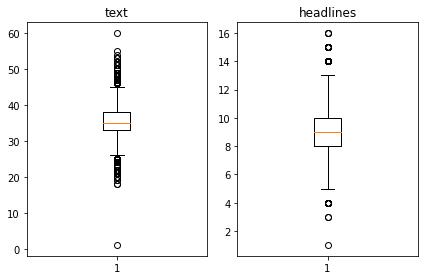

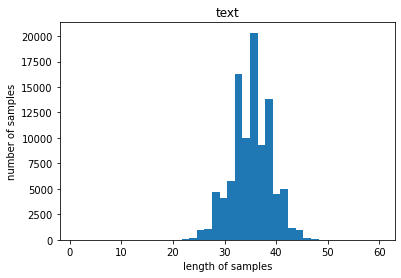

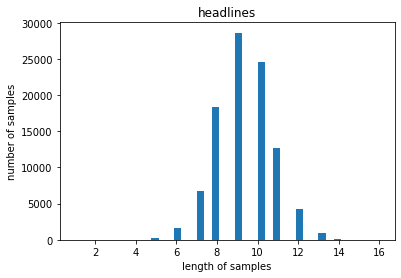

In [136]:
# 길이 분포 출력
import matplotlib.pyplot as plt

text_len = [len(s.split()) for s in data['text']]
summary_len = [len(s.split()) for s in data['headlines']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(text_len)
plt.title('text')
plt.subplot(1,2,2)
plt.boxplot(summary_len)
plt.title('headlines')
plt.tight_layout()
plt.show()

plt.title('text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('headlines')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

#### 위의 결과를 보면 text는 평균길이에 가까울수록 높은 밀도를 보여주며 headline또한 평균길이에서 가장 높은 밀도를 보여준다. 이러한 결과를 볼 때 데이터의 분포는 넓게 퍼지지 않은 좁은 모양이며 서로 비슷한 사이즈의 데이터들이 많아모델 학습에 적합한 데이터의 사이즈는 평균보다 약간의 여유를 주어 산정해볼 것이다.

In [137]:
text_max_len = 42
head_max_len = 12

In [138]:
# verify valid data portion

def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [139]:
below_threshold_len(text_max_len, data['text'])
below_threshold_len(head_max_len,  data['headlines'])

전체 샘플 중 길이가 42 이하인 샘플의 비율: 0.9750305002033347
전체 샘플 중 길이가 12 이하인 샘플의 비율: 0.9880337535583571


In [140]:
data = data[data['text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['headlines'].apply(lambda x: len(x.split()) <= head_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 94754


### work(1)-5: train/test split

모델 학습에 필요한 트레인과 테스트를 20% 비율로 나누어 각 데이터들을 셔플(뒤섞음)을 통해 모델이 overfitting의 위험을 낮추고 학습률을 개선시키고자 한다.

In [141]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['headlines'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['headlines'].apply(lambda x : x + ' eostoken')
data.head()

,headlines,text,decoder_input,decoder_target
0,upgrad learner switches to career in ml al wit...,saurav kant alumnus upgrad iiit pg program mac...,sostoken upgrad learner switches to career in ...,upgrad learner switches to career in ml al wit...
2,new zealand end rohit sharma led india match w...,new zealand defeated india wickets fourth odi ...,sostoken new zealand end rohit sharma led indi...,new zealand end rohit sharma led india match w...
3,aegon life iterm insurance plan helps customer...,aegon life iterm insurance plan customers enjo...,sostoken aegon life iterm insurance plan helps...,aegon life iterm insurance plan helps customer...
5,rahat fateh ali khan denies getting notice for...,pakistani singer rahat fateh ali khan denied r...,sostoken rahat fateh ali khan denies getting n...,rahat fateh ali khan denies getting notice for...
6,india get all out for their lowest odi total i...,india recorded lowest odi total new zealand ge...,sostoken india get all out for their lowest od...,india get all out for their lowest odi total i...


In [142]:
# convert to np.array
encoder_input = np.array(data['text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [143]:
# convert to np.array
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[47442 51341 92372 ... 34132  7252  4982]


In [144]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [145]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 18950


In [146]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 75804
훈련 레이블의 개수 : 75804
테스트 데이터의 개수 : 18950
테스트 레이블의 개수 : 18950


### work(1)-6-1 : toknizing in encoder

단어의 빈도수를 고려해 낮은 빈도의 단어들을 제외하는 것이 더 머신러닝에 효과가 있을까라는 생각을 하게 되었다. 이제까지 nlp관련 머신러닝에 대한 lms들은 빈도수가 낮은 데이터를 제외하고 훈련을 지향해 왔으며 괜찮은 성능들을 보여주었다. 하지만 요약의 목적에 대해서 빈도수가 낮은 단어들이 매우 핵심적인 의미를 내포하고 있고 그것을 빈도수의 관점에서 제외시킨다면 괜찮은 요약 결과를 얻기 힘들것이다. exploration에서 진행했었던 요약은 매우 성능이 뒤쳐졌으며 요약의 성능이 6살 짜리 아이보다 못했다. 따라서 이번 프로젝트에서 빈도수가 낮다는 이유로 모델 학습에서 제외시키지 않도록 고안하였다.

In [147]:
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [148]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 67838
등장 빈도가 6번 이하인 희귀 단어의 수: 46158
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 21680
단어 집합에서 희귀 단어의 비율: 68.04151065774344
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.546896517553312


In [149]:

src_vocab = 20000
src_tokenizer = Tokenizer(num_words=src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train) 

In [150]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[25, 407, 1306, 908, 177, 1319, 141, 4541, 6898, 569, 4014, 34, 164, 407, 2838, 978, 9068, 6614, 244, 134, 4387, 2646, 2839, 246, 10474, 4014, 34, 379, 214, 657], [54, 2285, 2248, 13, 103, 836, 355, 70, 1351, 25, 3, 3585, 52, 128, 208, 2014, 70, 1351, 79, 70, 1691, 89, 70, 1096, 355, 155, 276, 2209, 25, 3, 3585, 54, 10, 67, 20, 298, 580, 128, 44], [604, 69, 421, 444, 512, 3220, 14453, 2556, 637, 411, 421, 512, 1837, 744, 6692, 89, 7552, 1182, 1433, 411, 59, 104, 512, 1341, 623, 1464, 1923, 1909, 730, 281, 2015, 473, 3489]]


In [151]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

### work(1)-6-2 : toknizing in decoder

In [152]:
threshold = 6       # frequency of words
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 29614
등장 빈도가 5번 이하인 희귀 단어의 수: 19384
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 10230
단어 집합에서 희귀 단어의 비율: 65.45552779090971
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 4.773833445540196


In [153]:
tar_vocab = 10000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 348, 13, 398, 400, 393, 2495, 20, 263], [1, 401, 795, 187, 415, 2059, 7, 36, 39, 2686], [1, 1171, 726, 416, 1369, 341, 239, 2496], [1, 4560, 14, 1561, 4, 209, 57, 4, 9], [1, 71, 6, 363, 73, 4, 181, 2999, 320]]
target
decoder  [[348, 13, 398, 400, 393, 2495, 20, 263, 2], [401, 795, 187, 415, 2059, 7, 36, 39, 2686, 2], [1171, 726, 416, 1369, 341, 239, 2496, 2], [4560, 14, 1561, 4, 209, 57, 4, 9, 2], [71, 6, 363, 73, 4, 181, 2999, 320, 2]]


In [154]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='pre')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='pre')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=head_max_len, padding='pre')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=head_max_len, padding='pre')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=head_max_len, padding='pre')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=head_max_len, padding='pre')

In [155]:
decoder_input_train.shape

(75804, 12)

## work(2) : model desgin

In [156]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [157]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [158]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 42, 128)      2560000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 42, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

In [159]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [160]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 42)]         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 42, 128)      2560000     input_3[0][0]                    
__________________________________________________________________________________________________
lstm_4 (LSTM)                   [(None, 42, 256), (N 394240      embedding_2[0][0]                
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

## work(3) ; model training

In [161]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
297/297 [==============================] - 236s 757ms/step - loss: 5.9583 - val_loss: 5.2272
Epoch 2/50
297/297 [==============================] - 222s 748ms/step - loss: 5.2572 - val_loss: 5.1606
Epoch 3/50
297/297 [==============================] - 222s 749ms/step - loss: 5.1311 - val_loss: 4.9903
Epoch 4/50
297/297 [==============================] - 221s 745ms/step - loss: 4.9756 - val_loss: 4.8711
Epoch 5/50
297/297 [==============================] - 222s 749ms/step - loss: 4.8304 - val_loss: 4.7757
Epoch 6/50
297/297 [==============================] - 224s 754ms/step - loss: 4.7134 - val_loss: 4.6908
Epoch 7/50
297/297 [==============================] - 225s 757ms/step - loss: 4.6157 - val_loss: 4.6123
Epoch 8/50
297/297 [==============================] - 225s 759ms/step - loss: 4.5263 - val_loss: 4.5539
Epoch 9/50
297/297 [==============================] - 225s 758ms/step - loss: 4.4567 - val_loss: 4.5184
Epoch 10/50
297/297 [==============================] - 225s 757m

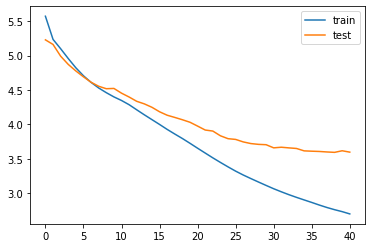

In [162]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## work(4) : inference modeling

In [164]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 요약 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 요약 단어 집합에서 정수 -> 단어를 얻음

In [165]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [166]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [170]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (head_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## work(5) : model test

In [171]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [172]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : video surfaced online shows block development officer uttar pradesh allegedly driving car nearly km youth bonnet reportedly youth onto bonnet attempt stop leaving group villagers visited demanding instalments construction toilets 
실제 요약 : up govt official drives for km as man on to 
예측 요약 :  drunk man beaten up to get morphed selfie with drunk driving


원문 : ranbir kapoor speaking drinking habit said tendency drink lot start stop guess blood family fond alcohol yes genes drink added ranbir earlier said working drink anything 
실제 요약 : cannot stop once start ranbir on his drinking 
예측 요약 :  do not want to do anything ranbir on ludhiana nepotism ranbir


원문 : income tax appellate tribunal ruled favour flipkart crore tax demand case rejected tax department argument discounts given flipkart capital expenditure flipkart claimed marketing expenses incurred yearly sell products thus revenues leading losses 
실제 요약 : tribunal rules in favour of flipkart in crore tax case 
예측 요약 :  govt to p

## work(6) : extractive summarization

In [174]:
import requests
from summa.summarizer import summarize

In [191]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/sunnysai12345/News_Summary/master/news_summary_more.csv", filename="news_summary_more.csv")
extractive_data = pd.read_csv('news_summary_more.csv', encoding='iso-8859-1')

In [192]:
extractive_data.head()

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...


In [195]:
extractive_data.loc[0,'text']

"Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers."

In [216]:
sliced_10_data = extractive_data.loc[:10,]
for idx in np.arange(len(sliced_10_data)):
    print("original text : ", sliced_10_data.loc[idx,'text'])
    print("headlines : ", sliced_10_data.loc[idx,'headlines'])
    print("extractive summarization : ", summarize(sliced_10_data.loc[idx,'text'], words=20))
    print("====================================================================================")

original text :  Saurav Kant, an alumnus of upGrad and IIIT-B's PG Program in Machine learning and Artificial Intelligence, was a Sr Systems Engineer at Infosys with almost 5 years of work experience. The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike. upGrad's Online Power Learning has powered 3 lakh+ careers.
headlines :  upGrad learner switches to career in ML & Al with 90% salary hike
extractive summarization :  The program and upGrad's 360-degree career support helped him transition to a Data Scientist at Tech Mahindra with 90% salary hike.
upGrad's Online Power Learning has powered 3 lakh+ careers.
original text :  Kunal Shah's credit card bill payment platform, CRED, gave users a chance to win free food from Swiggy for one year. Pranav Kaushik, a Delhi techie, bagged this reward after spending 2000 CRED coins. Users get one CRED coin per rupee of bill paid, which can be used to avail rewards from bra

## anlysis of result : 

이번 프로젝트에서 summarzation을 구현하기 위해 seq2seq를 이용하여 문장에 대해 encoder,decoder를 설계하였다.seq2seq는 한 문장을 인코더에 입력 받으면 decoder에서 몇개의 단어로 요약해주는 기능을 수행한다. 하지만 모든 hidden state가 고려되지 않는 한계성에 대해 이번 프로젝트에서는 더 적절한 단어들을 고려하여 요약의 결과 성능을 내기 위해 attention mechanism을 이용하여 각 hidden state의 weight의 동적화로 적절한 단어들을 요약하는데 성능의 개선을 수행하였다. attention mechanism을 이용한 abstractive한 결과물들은 어느정도 문법에 자연스러운 결과물들을 보여주었다. headline과 비교하였을 때 abstrative 결과들은 입력된 텍스트의 core적인 요약에서 몇몇 벗어난 결과들을 보여주지만 샘플10개에서 대체적으로 headline과 비슷한 수준의 자연스러운 문법과 내용들을 담고 있다. 이는 원문에서 몇가지 단어들을 뽑아 extractive한 결과와 비교해볼 때 더욱 두드러진다. extractive summarization의 결과들은 문법에 대해 어느정도 괜찮은 성능을 보여주지만 "핵심에 대한 요약"의 관점에서 보면 전혀 좋은 성능을 보여준다고 하기 어렵다. 몇몇 문장, 단어들을 그대로 뽑아 이질감이 들 정도로 짜집기한 결과들을 보여주며 결과를 토대로 내용에 대한 문맥을 짐작하기란 어려워보인다. 따라서 요약의 성능은 프로젝트 시작 전에 예상했듯 abstractive한 summarization이 더 좋은 결과를 내었다고 결론지을 수 있다.


## Limits :
이번 프로젝트를 수행하면서 LSTM, RNN, seq2seq, attention mechanism의 각각의 구체적인 이해가 부족한 상태에서 수행하였다.<br>
attetion mechanism을 적용하기 전 적용하였을 때 동일한 조건에서 얼마나 성능의 차이를 보이는지 확인했어야 했다.<br>
모델의 성능 개선이 필요했다.


## In my opinion

사람의 언어는 단순히 language로 encoding된 것들을 나열하지 않는다. 각 단어들이 뜻하는 의미로 유사성의 거리가 있으며 대체로 보편적이다. 어떤 사람에게 물어보아도 사랑이라는 단어와 애정이라는 단어는 매우 유사한 단어라고 생각한다. 이러한 유사함은 단어와 단어 뿐만 아니라 문법과 문맥에도 적용되어 단순 나열이 아닌 패턴을 형성한다. "나는 밥을 먹었다", "너는 어디 가느냐" 등과 같은 문장들은 자주 쓰는 패턴에 속한다. 이러한 패턴들은 사람이 빠르게 의미를 파악할 수 있게 하며 의사소통에서 바디랭귀지 보다 매우 효과적이다. 

이러한 문장구성, 문맥의 이해의 관점에서는 이번 프로젝트에서의 모델은 6살짜리 어린이와 버금가는 요약의 성능을 보여주었다고 생각한다. 이 모델은 단어들이 뜻하는 의미들을 사람보다 덜 학습되어 있고 단어들의 빈도에 의존하는 경향성이 있다. 이러한 문제는 모델 성능이 생각만큼 뛰어나지 않는 결과물들을 보여준 것인지 모른다.